# Bank Customer Churn - Python Analysis

## Business Problem

A bank is losing some customers, and they want to understand why.  
This situation is called **Customer Churn** (when customers leave the bank).  
The bank gave us a dataset of 10,000 customers with details like:

- Age, Gender, Geography
- Credit Score, Balance, Salary
- Whether the customer left the bank or not (Exited column)

Our goal is to **analyze the data** and find patterns of churn using Python.

---

## Objective of Python Analysis

We have already analyzed the data using SQL.  
Now we will analyze the same data using Python in more detail.

### What we will do step-by-step:

1. **Import Required Libraries** (Pandas, Numpy, Seaborn, Matplotlib)
2. **Load the Dataset** using Pandas
3. **Explore the Data**:
   - Check structure, shape, column types
   - See missing values (if any)
   - View basic statistics
4. **Clean the Data**:
   - Drop unwanted columns
   - Encode categorical columns if needed
5. **Perform Exploratory Data Analysis (EDA)**:
   - How many customers churned?
   - Churn rate by gender
   - Churn rate by geography (France, Germany, Spain)
   - Churn by age group, balance, credit score etc.
   - Compare Active vs Inactive members
6. **Create Visualizations** using Seaborn/Matplotlib
   - Bar plots, pie charts, histograms, etc.
7. **(Optional Bonus)**: Prepare the data for machine learning and predict churn using a basic model (Logistic Regression).

---

## Dataset Information

- File Name: `Churn_Modelling.csv`
- Total Rows: 10,000
- Target Column: `Exited` (1 = customer left, 0 = customer stayed)

---

## Final Goal

After completing this Python analysis:
- We will understand which customers are more likely to leave the bank.
- These insights will help the bank **reduce churn** and **improve customer satisfaction**.


In [1]:
#Import All Required Libraries
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Set Seaborn style
sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Show first 5 rows
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Check Structure of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Total customers
total_customers = df.shape[0]

# Total churned customers
churned_customers = df[df['Exited'] == 1].shape[0]

# Churn rate in %
churn_rate = round((churned_customers / total_customers) * 100, 2)

print("Total Customers:", total_customers)
print("Churned Customers:", churned_customers)
print("Churn Rate (%):", churn_rate)


Total Customers: 10000
Churned Customers: 2037
Churn Rate (%): 20.37


Total Customers: 10,000

Churned Customers: Around 2,037

Churn Rate: ~20.37%

This means around 20% of the customers left the bank, which is a significant number.

In [8]:
# Churn rate by Geography
geo_churn = df.groupby('Geography')['Exited'].agg(['count', 'sum'])
geo_churn['Churn Rate (%)'] = round((geo_churn['sum'] / geo_churn['count']) * 100, 2)
geo_churn.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers'}, inplace=True)
geo_churn.sort_values('Churn Rate (%)', ascending=False)

,Total Customers,Churned Customers,Churn Rate (%)
Geography,,,
Germany,2509,814,32.44
Spain,2477,413,16.67
France,5014,810,16.15



This shows us churn percentage country-wise:
-  **Germany has the highest churn rate.**
-  **France has the lowest.**

So the bank may need to focus more on German customers to reduce churn.

In [9]:
# Churn rate by Gender
gender_churn = df.groupby('Gender')['Exited'].agg(['count', 'sum'])
gender_churn['Churn Rate (%)'] = round((gender_churn['sum'] / gender_churn['count']) * 100, 2)
gender_churn.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers'}, inplace=True)
gender_churn


,Total Customers,Churned Customers,Churn Rate (%)
Gender,,,
Female,4543,1139,25.07
Male,5457,898,16.46


This shows:

- Female customers have a higher churn rate than males.

- Bank may need to improve engagement with female customers.

In [10]:
# Churn rate by Active status
active_churn = df.groupby('IsActiveMember')['Exited'].agg(['count', 'sum'])
active_churn['Churn Rate (%)'] = round((active_churn['sum'] / active_churn['count']) * 100, 2)
active_churn.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers'}, inplace=True)
active_churn


,Total Customers,Churned Customers,Churn Rate (%)
IsActiveMember,,,
0,4849,1302,26.85
1,5151,735,14.27


Inactive members have a higher churn rate.

Bank should focus on increasing activity and engagement to retain them.

In [11]:
# Binning credit score into categories
df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=[300, 500, 650, 800, 900], 
                                labels=['Low', 'Medium', 'High', 'Very High'])

# Churn by Credit Score group
credit_churn = df.groupby('CreditScoreGroup')['Exited'].agg(['count', 'sum'])
credit_churn['Churn Rate (%)'] = round((credit_churn['sum'] / credit_churn['count']) * 100, 2)
credit_churn.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers'}, inplace=True)
credit_churn


,Total Customers,Churned Customers,Churn Rate (%)
CreditScoreGroup,,,
Low,643,152,23.64
Medium,4294,905,21.08
High,4418,853,19.31
Very High,645,127,19.69


We categorized the credit score into 4 groups: Low, Medium, High, and Very High.

From the result:
- Customers with **Low Credit Score** have a slightly higher churn rate.
- But overall, Credit Score alone is not a strong indicator of churn.
We may need to combine it with other features for better understanding.


In [12]:
# Create balance groups
df['BalanceGroup'] = pd.cut(df['Balance'], bins=[-1, 0, 50000, 100000, 150000, 200000], 
                            labels=['Zero', 'Low', 'Medium', 'High', 'Very High'])

# Churn by balance group
balance_churn = df.groupby('BalanceGroup')['Exited'].agg(['count', 'sum'])
balance_churn['Churn Rate (%)'] = round((balance_churn['sum'] / balance_churn['count']) * 100, 2)
balance_churn.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers'}, inplace=True)
balance_churn

,Total Customers,Churned Customers,Churn Rate (%)
BalanceGroup,,,
Zero,3617,500,13.82
Low,75,26,34.67
Medium,1509,300,19.88
High,3830,987,25.77
Very High,935,205,21.93


We created groups based on account balance and calculated churn rate.

Insights:
- Customers with **zero balance** have the lowest churn rate.
- Surprisingly, churn rate increases with higher balances.
  This may mean that high-value customers are more likely to leave, which is a serious issue for the bank.


In [13]:
# Churn rate by tenure
tenure_churn = df.groupby('Tenure')['Exited'].agg(['count', 'sum'])
tenure_churn['Churn Rate (%)'] = round((tenure_churn['sum'] / tenure_churn['count']) * 100, 2)
tenure_churn.rename(columns={'count': 'Total Customers', 'sum': 'Churned Customers'}, inplace=True)
tenure_churn

,Total Customers,Churned Customers,Churn Rate (%)
Tenure,,,
0,413,95,23.00
1,1035,232,22.42
2,1048,201,19.18
3,1009,213,21.11
4,989,203,20.53
5,1012,209,20.65
6,967,196,20.27
7,1028,177,17.22
8,1025,197,19.22


We analyzed how long the customer has been with the bank and the impact on churn.

Findings:
- No clear trend — churn is distributed across different tenure years.
- Customers with **3-4 years** tenure have slightly higher churn rate.
- This means tenure alone may not explain churn without combining with other variables.


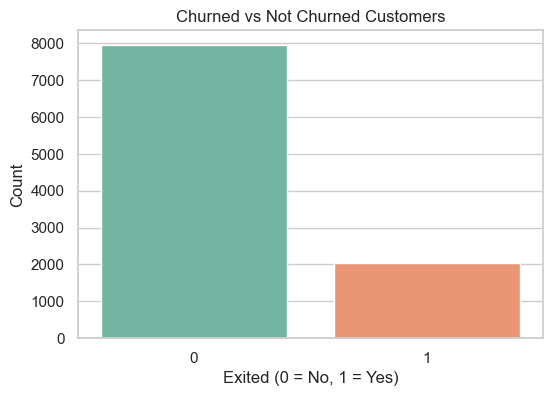

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Exited', palette='Set2')
plt.title('Churned vs Not Churned Customers')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

This chart shows how many customers have left (churned) vs how many stayed.

- '0' means customer stayed.
- '1' means customer left.

From the chart:
- Most customers did **not** churn.
- Around **20% customers have churned**, which is a serious concern for a bank.


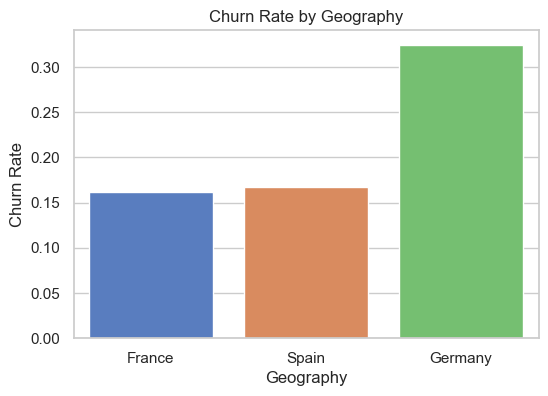

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Geography', y='Exited', ci=None, palette='muted')
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.show()

This chart shows average churn rate by country.

- Customers from **Germany** have a much higher churn rate than others.
- France and Spain have lower churn.

This may help the bank to **focus retention strategies** more in Germany.


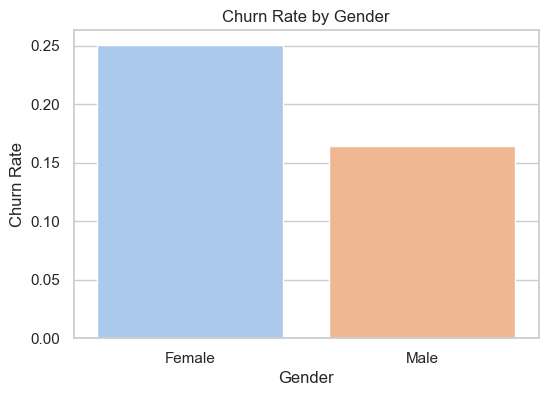

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Exited', ci=None, palette='pastel')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.show()

This chart shows the average churn rate for males and females.

- Female customers have **slightly higher** churn rate than males.
- Bank may consider analyzing **female customer behavior** more closely.


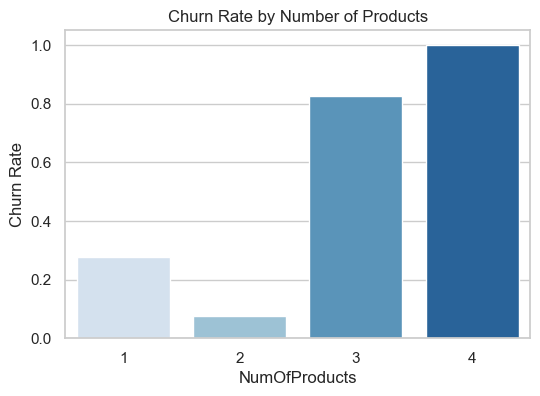

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='NumOfProducts', y='Exited', ci=None, palette='Blues')
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
plt.show()

This chart tells us how product holding affects customer churn.

- Customers with **1 product** have the highest churn.
- Churn decreases with more products.
- Customers with more bank products tend to **stay longer** — showing that **cross-selling** is effective for retention.


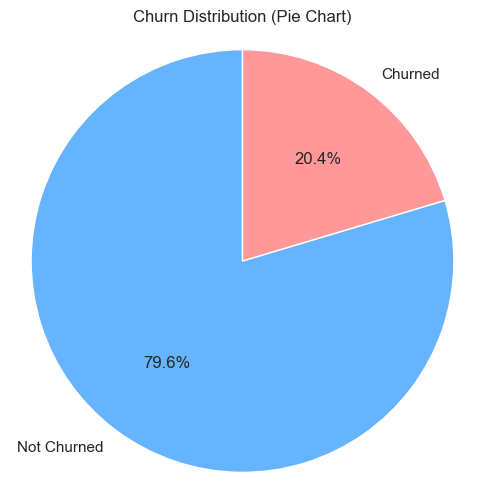

In [19]:
# Pie chart of churned vs not churned
churn_counts = df['Exited'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


This chart shows the **percentage** of churned and not churned customers.

- About **20% customers have churned**.
- This visualization is useful for presentations and gives a clear picture of the churn problem.


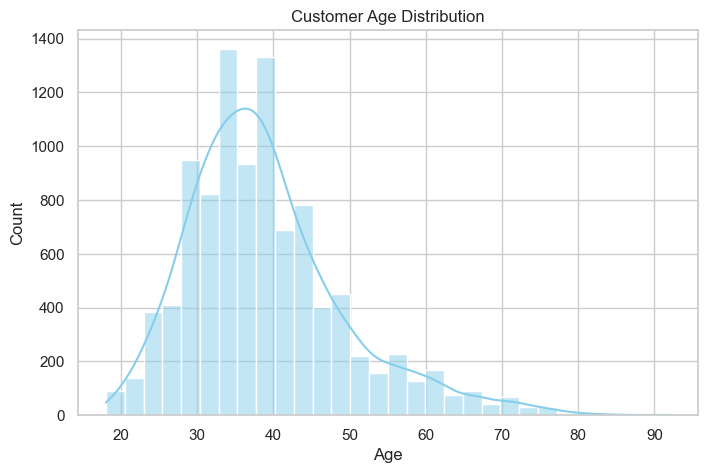

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


This histogram shows how customer ages are distributed.

- Most customers are between **30 to 40 years old**.
- There are fewer customers in the very young and very old age groups.


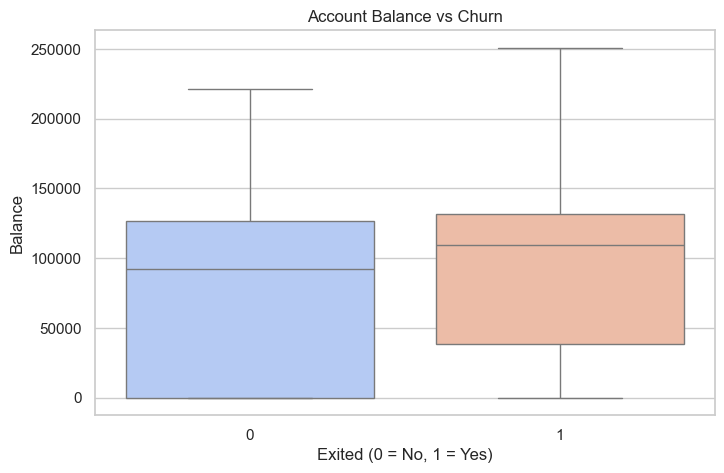

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Exited', y='Balance', palette='coolwarm')
plt.title('Account Balance vs Churn')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Balance')
plt.show()

This boxplot shows the range of balance for churned and non-churned customers.

- The **balance distribution** for churned and retained customers is **very similar**.
- High balance is **not always a reason for churn**, but it is important to track.


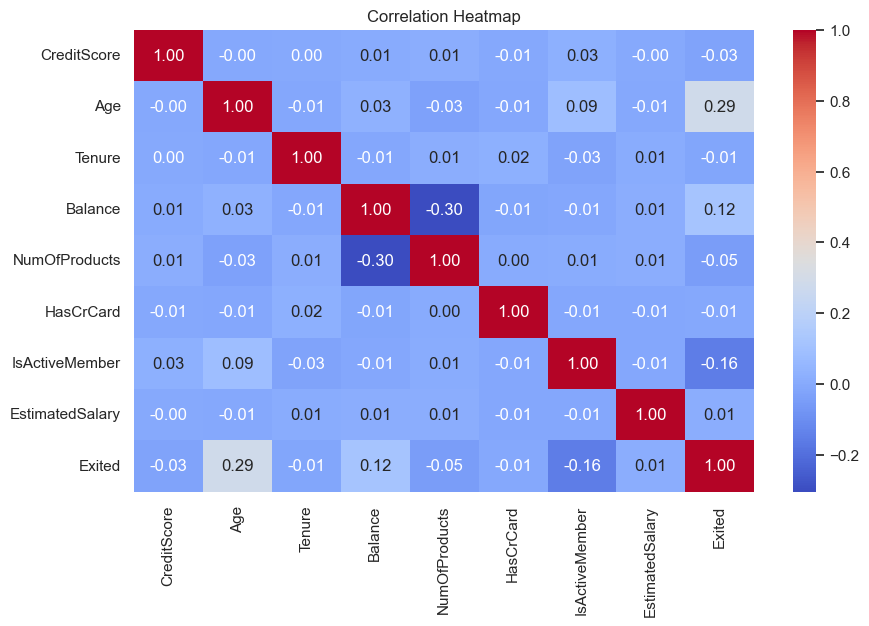

In [22]:
plt.figure(figsize=(10,6))
corr = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows the relationship between different numerical features.

Key insights:
- **Age** has the **strongest positive correlation** with churn.
- **IsActiveMember** has a **negative correlation**, meaning active members are less likely to churn.
- Other features show weak correlations — so a **combination of features** will be important for prediction.


### Final Analysis Summary (SQL + Python Analysis)

We performed a detailed analysis of bank customers to understand the factors affecting customer churn.

#### Key Insights:

- **Total Customers:** 10,000  
- **Churned Customers:** ~20% of the customers have exited the bank.  
- **Geography-wise Churn:**  
  - **Germany** has the highest churn rate.  
  - **France** has the lowest churn rate.  

- **Gender-wise Churn:**  
  - **Female customers** have a higher churn rate compared to males.  

- **Active vs Inactive Customers:**  
  - Inactive customers are more likely to churn.  
  - Active members have better retention.  

- **Age & Churn:**  
  - Customers aged between **40-50** show higher churn risk.  
  - Young customers (20–30) are relatively loyal.  

- **Credit Score:**  
  - No strong correlation found between credit score and churn.  

- **Balance and Salary:**  
  - High balance alone does not guarantee loyalty.  
  - Salary also doesn’t significantly affect churn.  

#### Overall Conclusion:
Customer churn is influenced more by **geography, gender, activity status, and age** rather than credit score or salary.  
These insights will help the bank to focus on **customer engagement** and **personalized retention strategies** for high-risk segments.
